In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import os

É possível filtrar e visualizar dinâmicamente os dados para essa US!

Para tal, altere o valor das duas variaveis logo abaixo, <i><b>anoDeConsulta</b><i> e <i><b>regiaoAConsultar</b><i>
  - <i><b>anoDeConsulta</b><i>: Os valores podem ser "2021" e "2020"
  - <i><b>regiaoAConsultar</b><i>: Os valores podem ser 1, 2, 3, 4 e 5, cada um representa uma região do Vale do Paraíba e agregam seus respectivos municípios, na quarta célula deste <i>notebook<i> você pode consultar os municípios e as regiões a qual eles pertencem

Os resultados da consulta estarão ao final do <i>notebook<i> após a execução do mesmo
    
## Atenção!
A região 4 apresenta inconsistências em seus dados, por isso os gráficos gerados não possuem uma boa visualização

In [2]:
regiaoAConsultar = 1
anoAConsultar = "2020"

In [3]:
dicionarioMeses = {
    1: "Janeiro", 
    2: "Fevereiro", 
    3: "Março", 
    4: "Abril", 
    5: "Maio", 
    6: "Junho", 
    7: "Julho", 
    8: "Agosto",
    9: "Setembro", 
    10: "Outubro", 
    11: "Novembro", 
    12: "Dezembro"
}
    
def pegarNomeMes(numeroMes):
    return dicionarioMeses[numeroMes]

In [4]:
dicionarioDeDados = {
    "sexo": {
        1: "Homem",
        3: "Mulher",
        9: "Não identificado"
    },
    "tipomovimentação": {
        10: "Admissão", #"Admissão por primeiro emprego",
        20: "Admissão", #"Admissão por reemprego,"
        25: "Admissão", #"Admissão por contrato trabalho prazo determinado",
        31: "Demissão", #"Desligamento por demissão sem justa causa",
        32: "Demissão", #"Desligamento por demissão com justa causa",
        33: "Demissão", #"Culpa Recíproca",
        35: "Admissão", #"Admissão por reintegração",
        40: "Demissão", #"Desligamento a pedido",
        43: "Demissão", #"Término contrato trabalho prazo determinado",
        45: "Demissão", #"Desligamento por Término de contrato",
        50: "Demissão", #"Desligamento por aposentadoria",
        60: "Demissão", #"Desligamento por morte",
        70: "Admissão", #"Admissão por transferência",
        80: "Demissão", #"Desligamento por transferência",
        90: "Demissão", #"Desligamento por Acordo entre empregado e empregador",
        98: "Demissão", #"Desligamento de Tipo Ignorado",
        99: "Não Identificado"
    },
    "município": {
        350850: "Caçapava",            # Grupo 1
        352020: "Igaratá",             # Grupo 1
        352440: "Jacareí",             # Grupo 1
        352490: "Jambeiro",            # Grupo 1
        353170: "Monteiro Lobato",     # Grupo 1
        353560: "Paraíbuna",           # Grupo 1
        354600: "Santa Branca",        # Grupo 1
        354990: "São José dos Campos", # Grupo 1
        350970: "Campos do Jordão",        # Grupo 2
        352630: "Lagoinha",                # Grupo 2
        353230: "Natividade da Serra",     # Grupo 2
        353800: "Pindamonhangaba",         # Grupo 2
        354230: "Redenção da Serra",       # Grupo 2
        354820: "Santo Antônio do Pinhal", # Grupo 2
        354860: "São Bento do Sapucaí",    # Grupo 2
        355000: "São Luiz do Paraitinga",  # Grupo 2
        355410: "Taubaté",                 # Grupo 2
        355480: "Tremembé",                # Grupo 2
        350250: "Aparecida",          # Grupo 3
        350860: "Cachoeira Paulista", # Grupo 3
        350995: "Canas",              # Grupo 3
        351360: "Cunha",              # Grupo 3
        351840: "Guaratinguetá",      # Grupo 3
        352720: "Lorena",             # Grupo 3
        353850: "Piquete",            # Grupo 3
        354075: "Potim",              # Grupo 3
        354430: "Roseira",            # Grupo 3
        350315: "Arapeí",               # Grupo 4
        350350: "Areias",               # Grupo 4
        350490: "Bananal",              # Grupo 4
        351340: "Cruzeiro",             # Grupo 4
        352660: "Lavrinhas",            # Grupo 4
        354190: "Queluz",               # Grupo 4
        354960: "São José do Barreiro", # Grupo 4
        355200: "Silveiras",            # Grupo 4
        351050: "Caraguatatuba", # Grupo 5
        352040: "Ilhabela",      # Grupo 5
        355070: "São Sebastião", # Grupo 5
        355540: "Ubatuba"        # Grupo 5
    }
}

In [5]:
def lerTabelasDiretorio(ano, colunasUtilizaveis):
    caminhoDados = "../doc/Dados/CAGED"
    
    fonteDados = os.listdir(caminhoDados + "/" + ano)
    
    # Retira os arquivos que não são do tipo .txt da lista
    for arquivo in fonteDados:
        if ".txt" not in arquivo:
            del fonteDados[fonteDados.index(arquivo)]
            
    tabelas = {}
    
    for nomeTabela in fonteDados:
        valorMes = int(nomeTabela.split(".")[0][-2:])  # Pega os dois últimos valores do nome do arquivo, que representam o mês e converte para um inteiro
        nomeMes = pegarNomeMes(valorMes)
        tabelas[nomeMes] = pandas.read_csv(caminhoDados + "/" + ano + "/" + nomeTabela,
                                           delimiter=";",
                                           usecols=colunasUtilizaveis)
        
    return tabelas

In [6]:
colunasUtilizaveis = ["sexo", "tipomovimentação", "município"]

dados2020 = lerTabelasDiretorio("2020", colunasUtilizaveis)
dados2021 = lerTabelasDiretorio("2021", colunasUtilizaveis)

In [7]:
def organizarPorRegiao(dadosCrus):
    novosDados = {}
    
    for mes in dadosCrus:
        for codigoRegiao in dicionarioDeDados["município"]:
            nomeMunicipio = dicionarioDeDados["município"][codigoRegiao]
            
            mascara = dadosCrus[mes]["município"] == codigoRegiao
            
            filtrado = dadosCrus[mes][mascara]
            
            if nomeMunicipio not in novosDados:
                novosDados[nomeMunicipio] = {
                    mes: filtrado
                }
            else:
                novosDados[nomeMunicipio][mes] = filtrado
    
    return novosDados

In [8]:
def pegarSomaTotalGrupo(grupo, colunaParaSomar):
    return grupo.groupby(colunaParaSomar).count().values[0][0]

def pegarTipoColunaGrupo(grupo, nomeColuna):
    indexColuna = grupo.columns.get_loc(nomeColuna)
    return grupo.sample().values[0][indexColuna]

In [9]:
def pegarSomaTotalGrupo(grupo, colunaParaSomar):
    return grupo.groupby(colunaParaSomar).count().values[0][0]

def pegarTipoColunaGrupo(grupo, nomeColuna):
    indexColuna = grupo.columns.get_loc(nomeColuna)
    return grupo.sample().values[0][indexColuna]

def agruparDados(dadosParaAgrupar):
    dadosAgrupados = {}
    
    for mes in dadosParaAgrupar:
        dadosAgrupados[mes] = {}
        
        for generoCru in dadosParaAgrupar[mes]:
            a = dicionarioDeDados["sexo"][generoCru]
            genero = dicionarioDeDados["sexo"][generoCru]
            
            if genero not in dadosAgrupados[mes]:
                dadosAgrupados[mes][genero] = {}
            
            for tipoMovimentacaoCru in dadosParaAgrupar[mes][generoCru]:
                tipoMovimentacao = dicionarioDeDados["tipomovimentação"][tipoMovimentacaoCru]
                
                if tipoMovimentacao not in dadosAgrupados[mes][genero]:
                    dadosAgrupados[mes][genero][tipoMovimentacao] = dadosParaAgrupar[mes][generoCru][tipoMovimentacaoCru]
                else:
                    dadosAgrupados[mes][genero][tipoMovimentacao] += dadosParaAgrupar[mes][generoCru][tipoMovimentacaoCru]
    
    return dadosAgrupados
            

def filtrarDados(dadosCrus):
    total = {}
    
    for mes in dadosCrus:
        grupo = dadosCrus[mes].groupby(["sexo", "tipomovimentação"])

        total[mes] = {}

        for chave, valor in grupo:
            grupinho = grupo.get_group(chave)

            totalMovi = pegarSomaTotalGrupo(grupinho, "tipomovimentação")
            tipoMovi = pegarTipoColunaGrupo(grupinho, "tipomovimentação")

            tipoSexo = pegarTipoColunaGrupo(grupinho, "sexo")

            if tipoSexo not in total[mes]:
                total[mes][tipoSexo] = {}

            if tipoMovi not in total[mes][tipoSexo]:
                total[mes][tipoSexo][tipoMovi] = totalMovi
            else:
                total[mes][tipoSexo][tipoMovi] += totalMovi
                
    dadosTratados = agruparDados(total)
    
    return dadosTratados

In [10]:
dadosPorRegiao2020 = organizarPorRegiao(dados2020)
dadosPorRegiao2021 = organizarPorRegiao(dados2021)

dadosFiltrados2020 = {}
dadosFiltrados2021 = {}

for regiao in dadosPorRegiao2020:
    dadosFiltrados2020[regiao] = filtrarDados(dadosPorRegiao2020[regiao])
    
for regiao in dadosPorRegiao2021:
    dadosFiltrados2021[regiao] = filtrarDados(dadosPorRegiao2021[regiao])

In [11]:
def plotarGrafico(gruposDeDados, legenda, labelEixoX, labelEixoY,titulo, proporcao):
    plt.figure(figsize=proporcao, dpi=500)
    plt.subplot(212)
    
    for grupo in gruposDeDados:
        plt.plot(grupo["x"], grupo["y"])

    # Desabilita a notação científica no eixo Y
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    # Coloca um título no gráfico
    plt.title(titulo)
    
    # Adiciona linhas de referência
    plt.grid(True)
    
    # Adiciona a legenda ao gráfico
    plt.legend(legenda, bbox_to_anchor=(1.2, 1.0), loc='upper right')

    # Coloca títulos para os eixos do gráfico
    plt.xlabel(labelEixoX)
    plt.ylabel(labelEixoY)

    # Exibe o gráfico com todos os subgráficos
    plt.show()

In [12]:
def dadosPorGenero(dados, generoParaFiltrar):
    filtradoPorGenero = {}
    
    for mes in dados:
        for genero in dados[mes]:
            if genero == generoParaFiltrar:
                if "Admissão" in dados[mes][genero]:
                    admissoes = dados[mes][genero]["Admissão"]
                else:
                    admissoes = 0
                    
                if "Demissão" in dados[mes][genero]:
                    demissoes = dados[mes][genero]["Demissão"]
                else:
                    demissoes = 0
                    
                filtradoPorGenero[mes] = {
                    "Admissão": admissoes,
                    "Demissão": demissoes,
                }
    
    return filtradoPorGenero

def prepararDadosParaPlotar(dados, aliasX = "", aliasY = ""):
    dadosPreparados = {
        "x": [],
        "y": []
    }
    
    for chave in dicionarioMeses:
        mes = dicionarioMeses[chave]
        
        if mes in dados:
            dadosPreparados["x"].append(mes)
            dadosPreparados["y"].append(dados[mes][aliasY])
            
    return dadosPreparados

In [13]:
def exibirGraficosPorRegiao(dados, grupoDeRegioes):
    dadosHomensRegiao = {
        "Admissão": [],
        "Demissão": []
    }
    dadosMulheresRegiao = {
        "Admissão": [],
        "Demissão": []
    }
    
    for regiao in grupoDeRegioes:
        dadosRegiao = dados[regiao]
        
        homensRegiao = dadosPorGenero(dadosRegiao, "Homem")
        mulheresRegiao = dadosPorGenero(dadosRegiao, "Mulher")
        
        dadosHomensRegiao["Admissão"].append(prepararDadosParaPlotar(homensRegiao, aliasY = "Admissão"))
        dadosHomensRegiao["Demissão"].append(prepararDadosParaPlotar(homensRegiao, aliasY = "Demissão"))
        
        dadosMulheresRegiao["Admissão"].append(prepararDadosParaPlotar(mulheresRegiao, aliasY = "Admissão"))
        dadosMulheresRegiao["Demissão"].append(prepararDadosParaPlotar(mulheresRegiao, aliasY = "Demissão"))
        
    plotarGrafico(dadosHomensRegiao["Admissão"], 
          grupoDeRegioes, 
          "Meses", "Número de admissões", 
          "Admissões de homens no período da pandemia - 2020", 
          (12, 8))
    plotarGrafico(dadosMulheresRegiao["Admissão"], 
          grupoDeRegioes,
          "Meses", "Número de admissões", 
          "Admissões de mulheres no período da pandemia - 2020", 
          (12, 8))
    
    plotarGrafico(dadosHomensRegiao["Demissão"], 
          grupoDeRegioes, 
          "Meses", "Número de admissões", 
          "Demissões de mulheres no período da pandemia - 2020", 
          (12, 8))
    plotarGrafico(dadosMulheresRegiao["Demissão"], 
          grupoDeRegioes,
          "Meses", "Número de demissões", 
          "Demissões de mulheres no período da pandemia - 2020", 
          (12, 8))

In [14]:
dicionarioRegioes = {
    1: ["Caçapava", "Igaratá", "Jacareí", "Jambeiro", "Monteiro Lobato", "Paraíbuna", "Santa Branca",
        "São José dos Campos"],
    2: ["Campos do Jordão", "Lagoinha", "Natividade da Serra", 
               "Pindamonhangaba", "Redenção da Serra", "Santo Antônio do Pinhal", 
               "São Bento do Sapucaí", "São Luiz do Paraitinga", "Taubaté", "Tremembé"],
    3: ["Aparecida", "Cachoeira Paulista", "Canas", "Cunha", "Guaratinguetá", "Lorena",
        "Piquete", "Potim", "Roseira"],
    4: ["Arapeí", "Areias", "Bananal", "Cruzeiro", "Lavrinhas", "Queluz", "São José do Barreiro", "Silveiras"],
    5: ["Caraguatatuba", "Ilhabela", "São Sebastião", "Ubatuba"]
}


dadosPorRegiao = {
    "2020": dadosFiltrados2020,
    "2021": dadosFiltrados2021
}
grupoRegioes = dicionarioRegioes[regiaoAConsultar]
dadosRegiaoEscolhida = dadosPorRegiao[anoAConsultar]

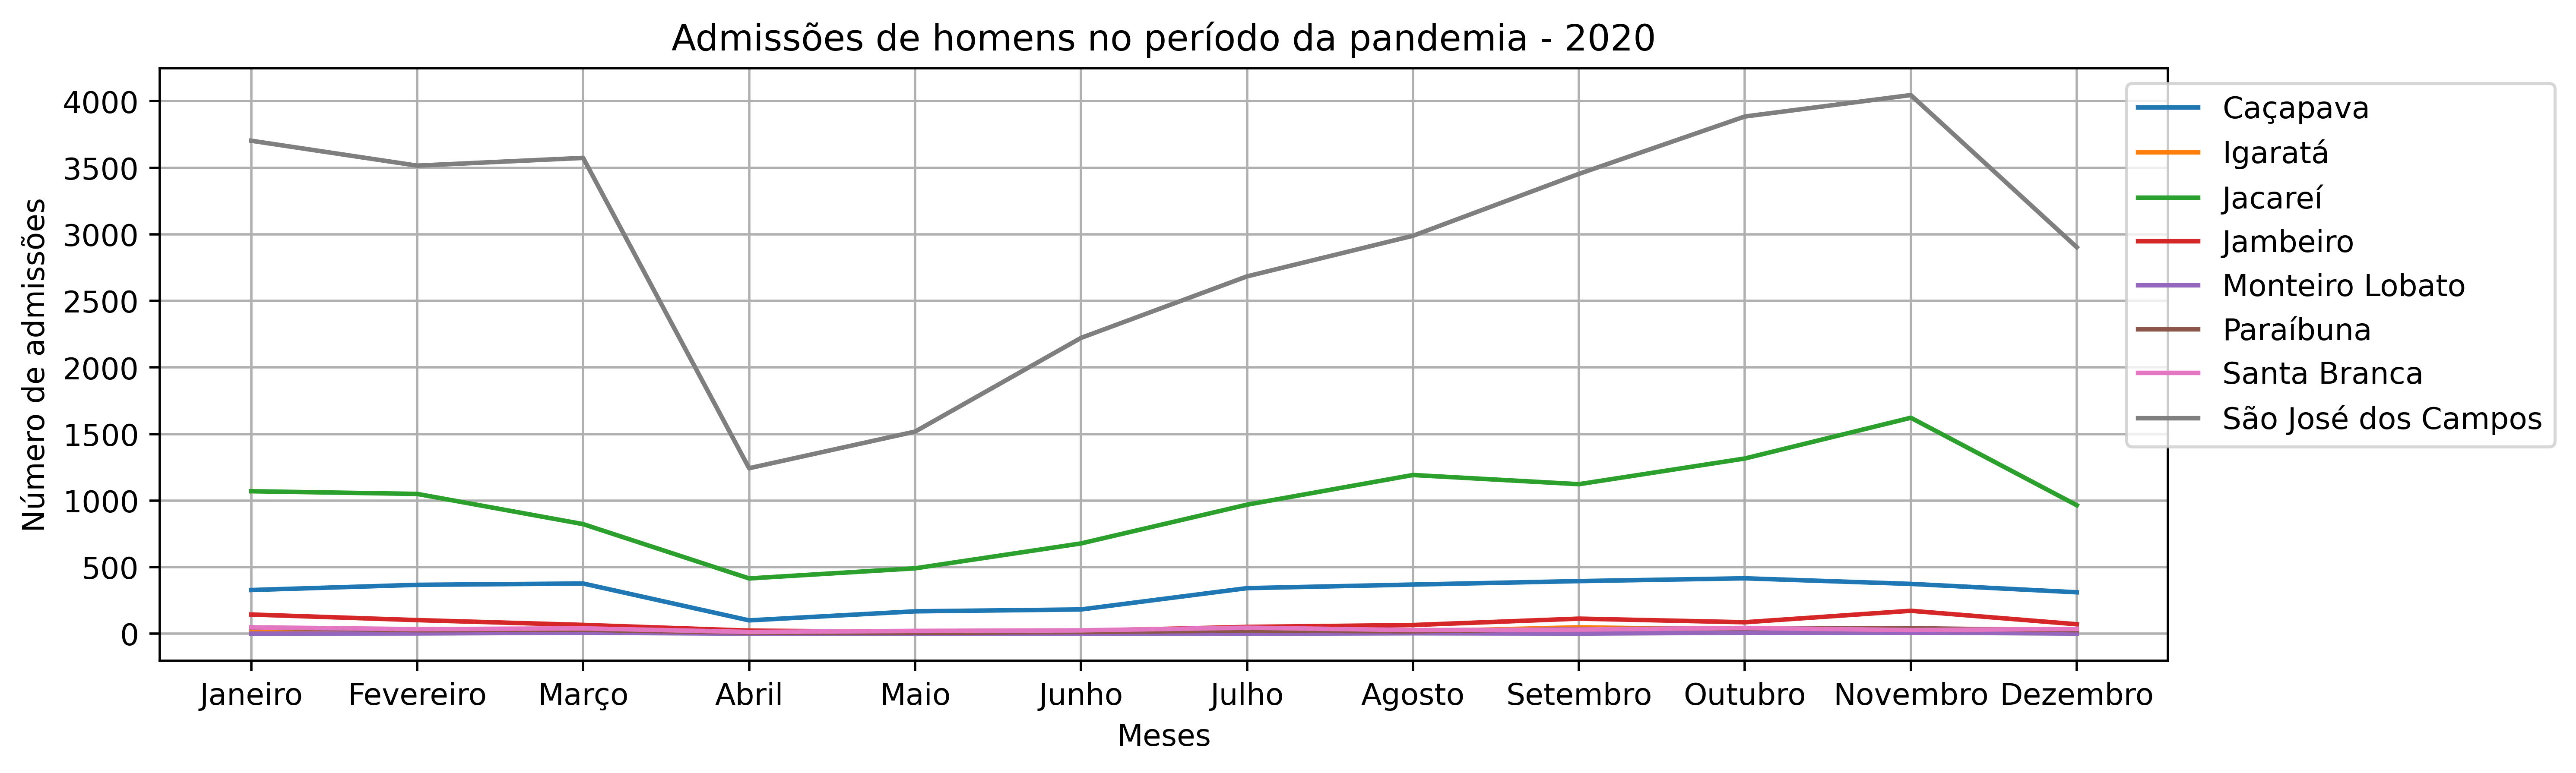

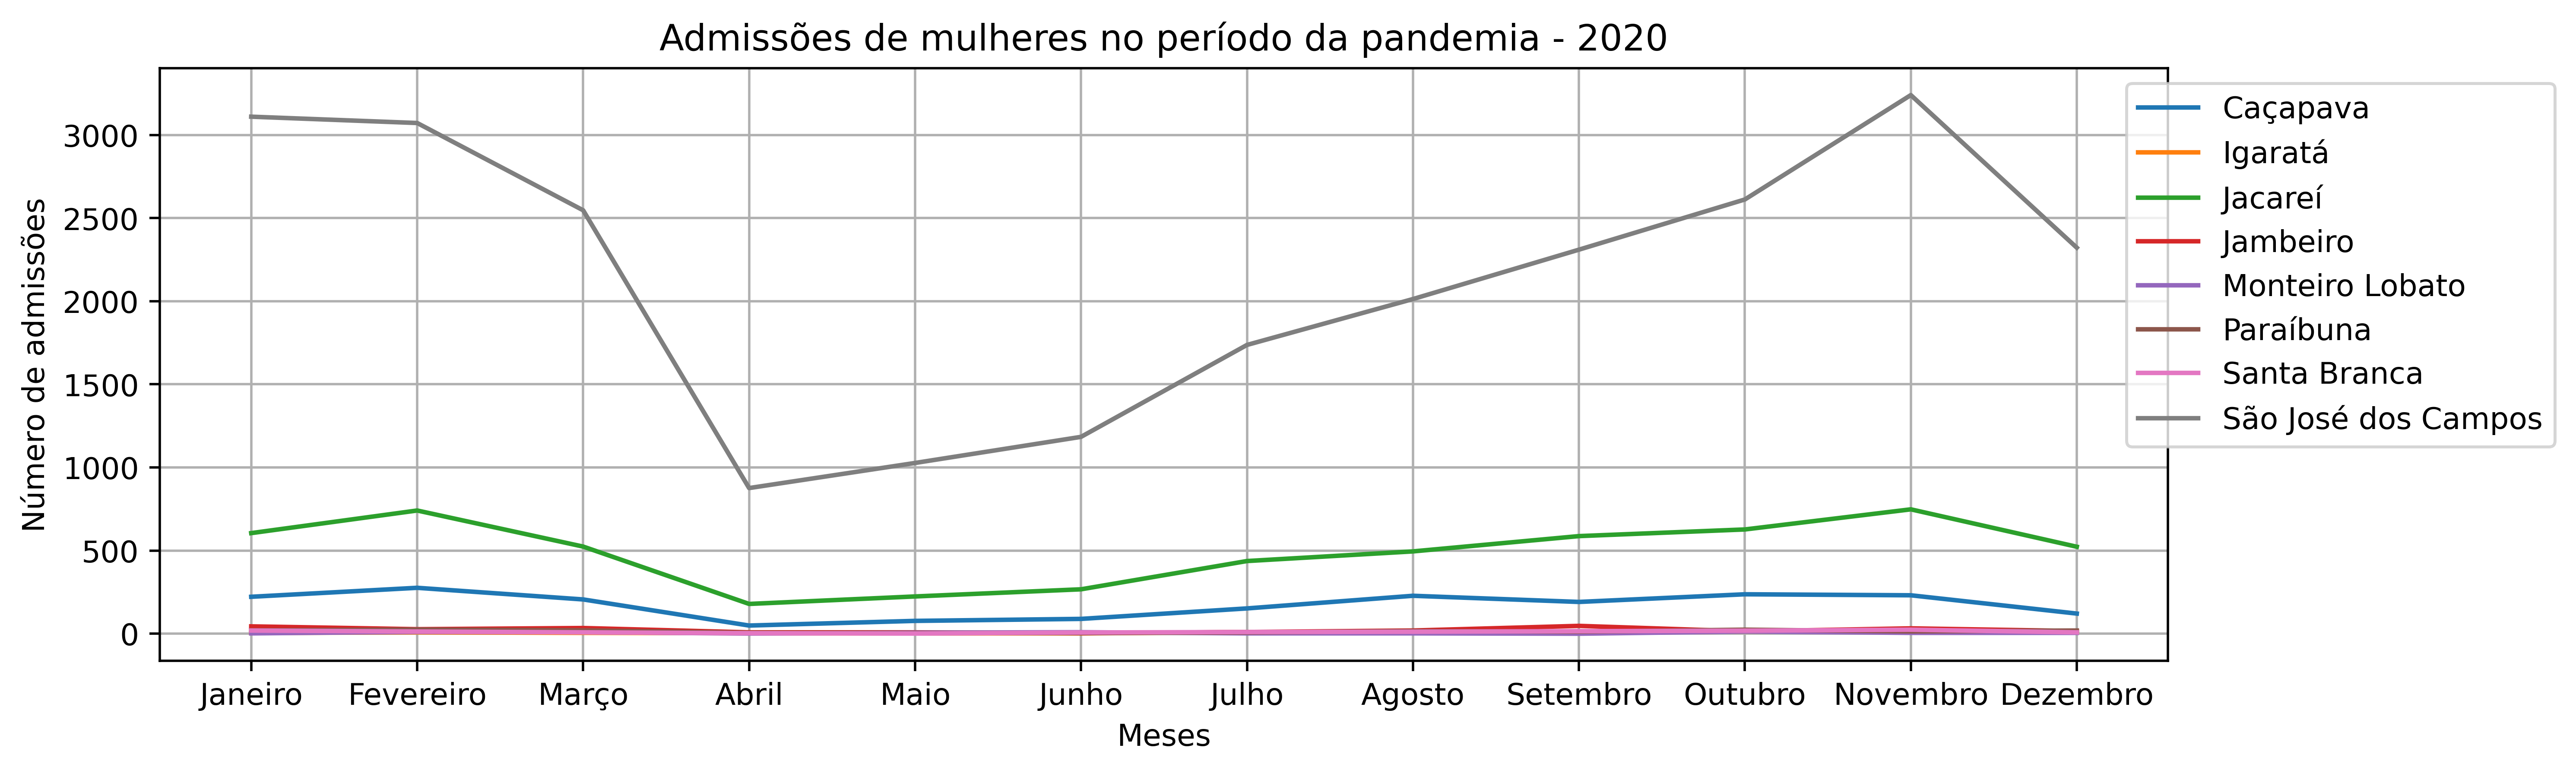

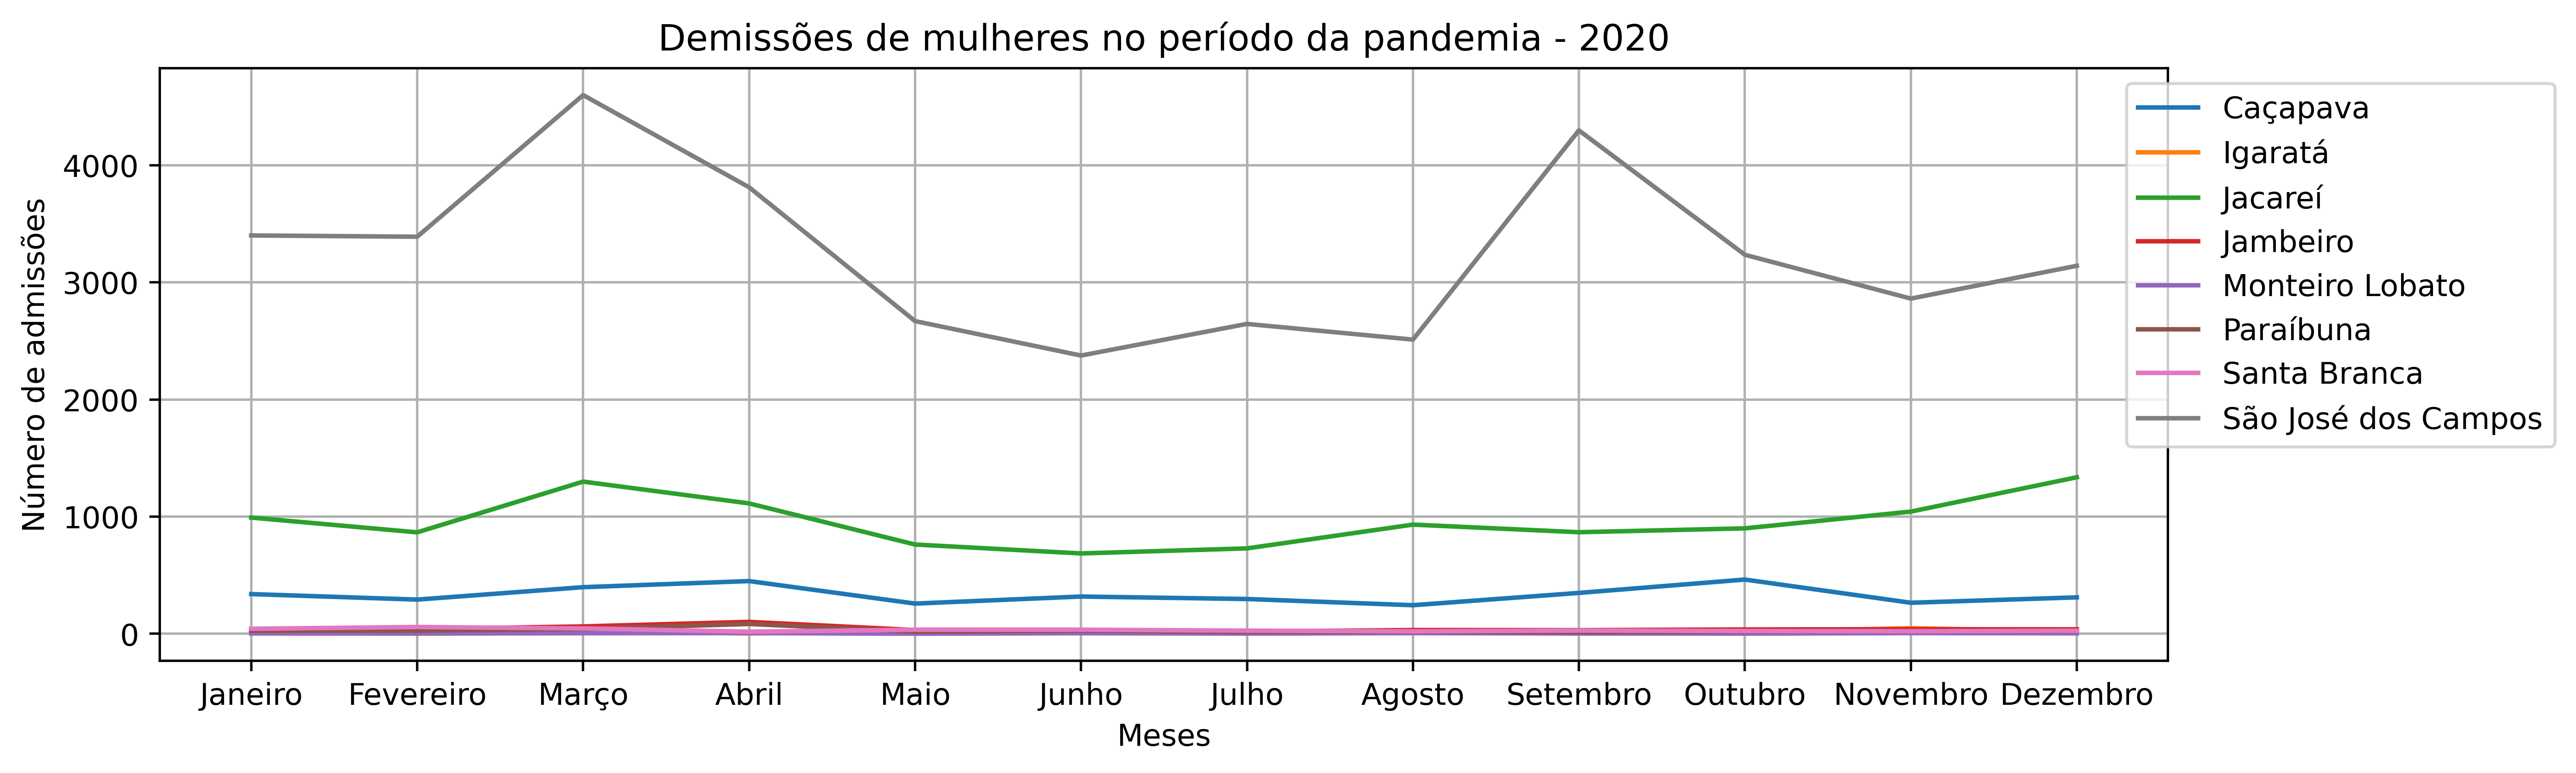

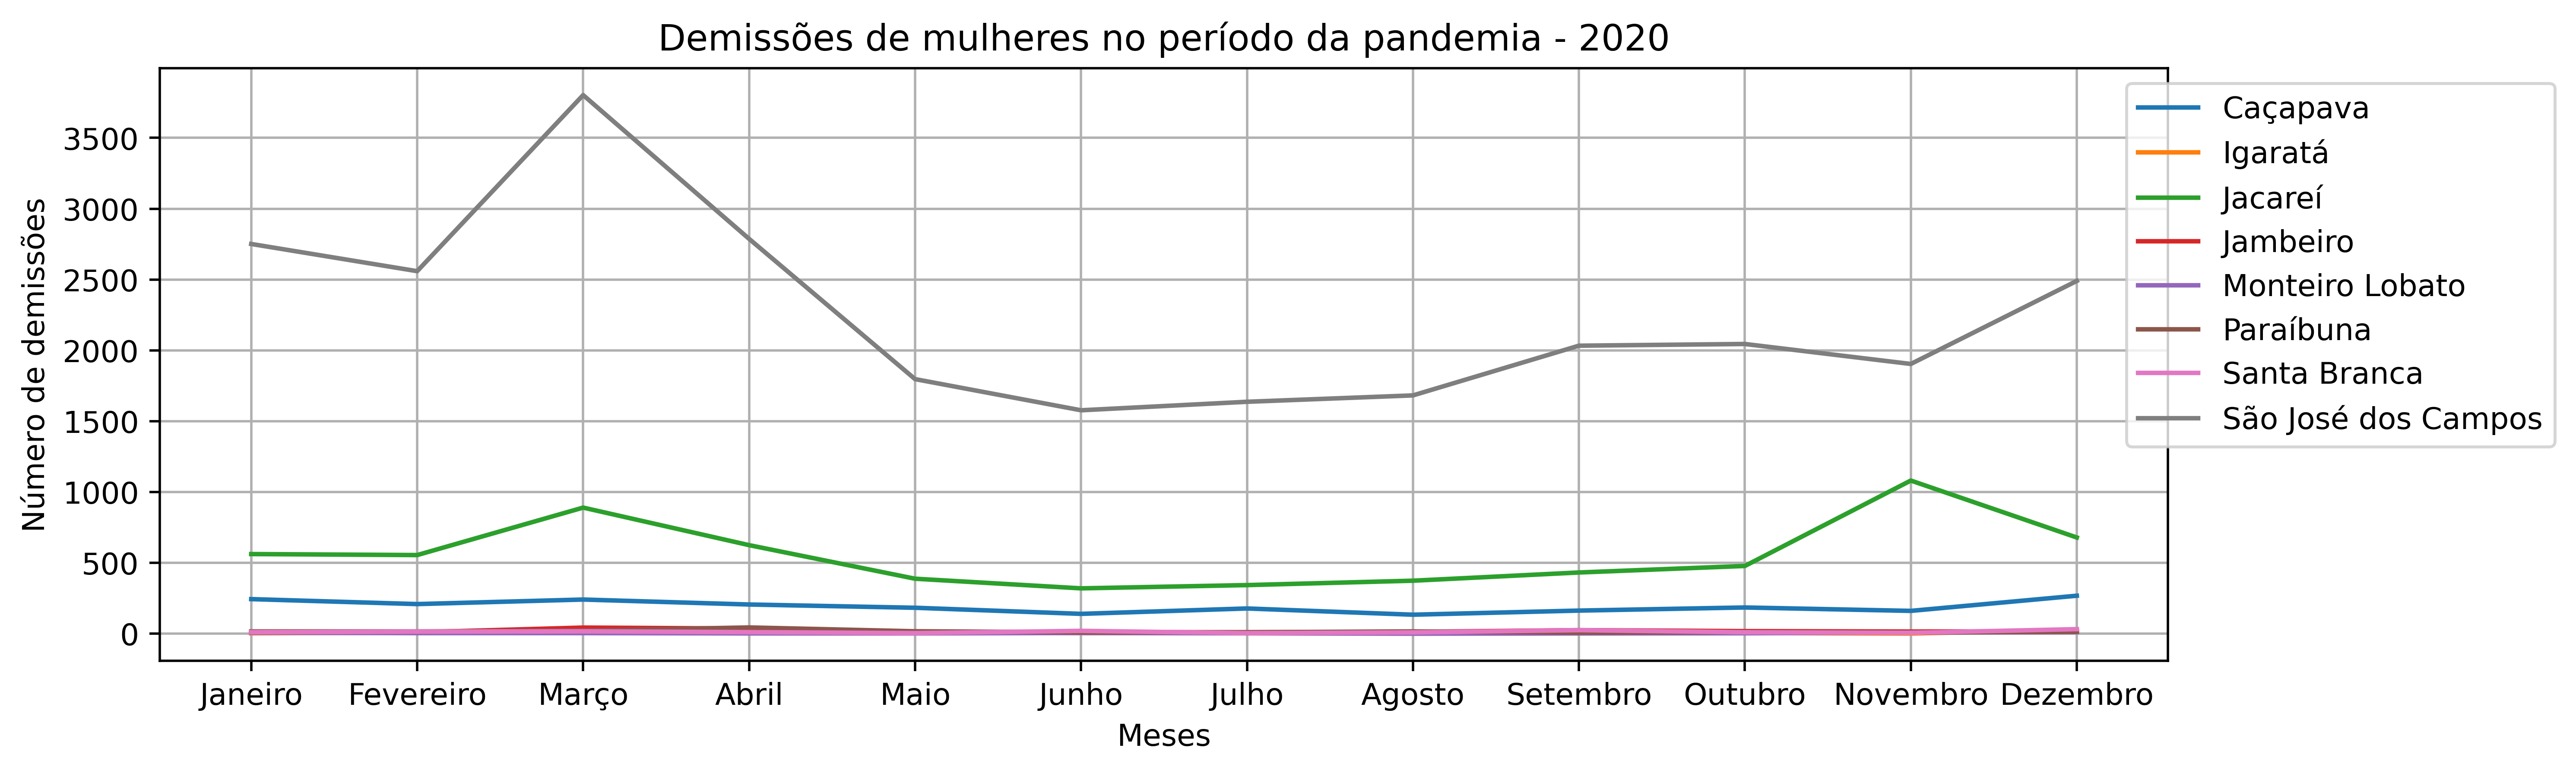

In [15]:
exibirGraficosPorRegiao(dadosRegiaoEscolhida, grupoRegioes)